In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import numpy as numpy
import glob, os
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [3]:
%%bash
cp /Users/nwolfe/git/neural-network/*.csv .

In [4]:
csv_files = ['drshape.network.acc96.dnn.ranking-result.csv']
with open(csv_files[0], 'r') as dest_f:
    data_iter = csv.reader(dest_f, 
                           delimiter = ',', 
                           quotechar = '"')
    data = [data for data in data_iter]
    data_array = numpy.asarray(data, dtype=numpy.float32)

In [5]:
data_array.shape

(100, 3)

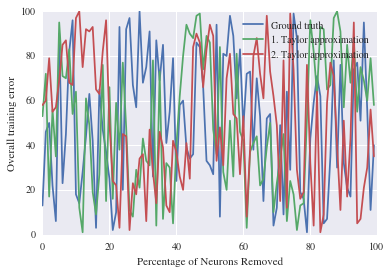

In [6]:
legend_list = [
    r'Ground truth',
    r'1. Taylor approximation',
    r'2. Taylor approximation'
]
for i in [0, 1, 2]:
    plt.plot(data_array[:, i])
    plt.xlabel('Percentage of Neurons Removed')
    plt.ylabel('Overall training error')
    plt.ylim((0, 100))

plt.legend(legend_list)
# plt.savefig('greedy_algo_comparison.pdf'.format(i+1), bbox_inches='tight', pad_inches=-0.000005)
plt.show()

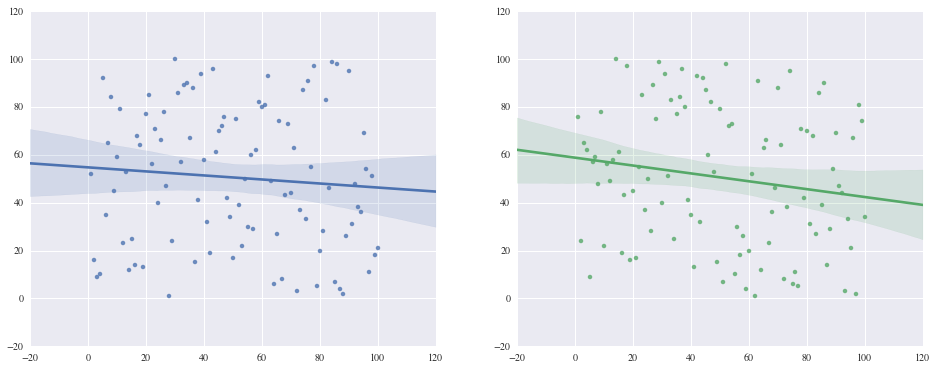

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.regplot(x=data_array[:, 0], y=data_array[:, 1], ax=ax1);
sns.regplot(x=data_array[:, 0], y=data_array[:, 2], ax=ax2);
plt.show()

In [8]:
def make_graph(name, scale=None, export=True):
    print(name)
    with open(name, 'r') as dest_f:
        data_iter = csv.reader(dest_f, 
                               delimiter = ',', 
                               quotechar = '"')
        data = [data for data in data_iter]
    data_array = numpy.asarray(data, dtype=numpy.float32)
    legend_list = [
        r'Ground truth',
        r'1st derivative approximation',
        r'2nd derivative approximation'
    ]
    for i in [0, 1, 2]:
        plt.plot(data_array[:, i])

    if scale is not None:
        plt.ylim((0, scale))
    plt.xlabel('Percentage of Neurons Removed')
    plt.ylabel('Sum of Squared Errors')
    plt.legend(legend_list)
    if export:
        plt.savefig('plot.old.'+name+'.pdf'.format(i+1), bbox_inches='tight', pad_inches=0.05)
    plt.show()

In [9]:
%%bash
ls *greedy*

circle.network.dnn.greedy-algo-comparison.csv
cos.big.network.dnn.greedy-algo-comparison.csv
cos.network.dnn.greedy-algo-comparison.csv
diamond.network.dnn.greedy-algo-comparison.csv
drshape.network.acc96.dnn.greedy-algo-comparison.csv
drshape.network.dnn.greedy-algo-comparison.csv
greedy_algo_comparison-old.csv
greedy_algo_comparison.csv
greedy_algo_comparison.pdf
mod.circle.network.dnn.greedy-algo-comparison.csv
mod.cos.network.dnn.greedy-algo-comparison.csv
mod.diamond.network.dnn.greedy-algo-comparison.csv
mod.rshape.network.dnn.greedy-algo-comparison.csv
mod.xor.network.dnn.greedy-algo-comparison.csv
plot.cos.big.network.dnn.greedy-algo-comparison.csv.pdf
plot.cos.network.dnn.greedy-algo-comparison.csv.pdf
plot.drshape.network.acc96.dnn.greedy-algo-comparison.csv.pdf
plot.mod.circle.network.dnn.greedy-algo-comparison.csv.pdf
plot.mod.cos.network.dnn.greedy-algo-comparison.csv.pdf
plot.mod.diamond.network.dnn.greedy-algo-comparison.csv.pdf
plot.mod.rshape.network.dnn.greedy-algo-co

In [10]:
%%bash
ls *accuracy*

acc-accuracy_dropoff_comparison.csv
accuracy_dropoff_comparison.csv
circle.network.dnn.accuracy-dropoff-comparison.csv
cos.big.network.dnn.accuracy-dropoff-comparison.csv
cos.network.dnn.accuracy-dropoff-comparison.csv
diamond.network.dnn.accuracy-dropoff-comparison.csv
drshape.network.acc96.dnn.accuracy-dropoff-comparison.csv
drshape.network.dnn.accuracy-dropoff-comparison.csv
mod.circle.network.dnn.accuracy-dropoff-comparison.csv
mod.cos.network.dnn.accuracy-dropoff-comparison.csv
mod.diamond.network.dnn.accuracy-dropoff-comparison.csv
mod.rshape.network.dnn.accuracy-dropoff-comparison.csv
mod.xor.network.dnn.accuracy-dropoff-comparison.csv
plot.cos.big.network.dnn.accuracy-dropoff-comparison.csv.pdf
plot.cos.network.dnn.accuracy-dropoff-comparison.csv.pdf
plot.drshape.network.acc96.dnn.accuracy-dropoff-comparison.csv.pdf
plot.mod.circle.network.dnn.accuracy-dropoff-comparison.csv.pdf
plot.mod.cos.network.dnn.accuracy-dropoff-comparison.csv.pdf
plot.mod.diamond.network.dnn.accuracy-d

In [11]:
%%bash
cp /Users/nwolfe/git/neural-network/*.csv .

circle.network.dnn.greedy-algo-comparison.csv


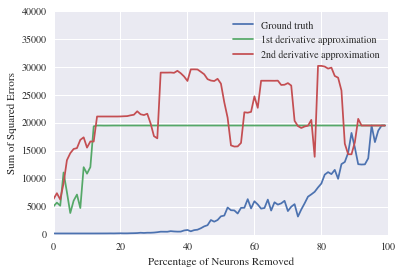

circle.network.dnn.accuracy-dropoff-comparison.csv


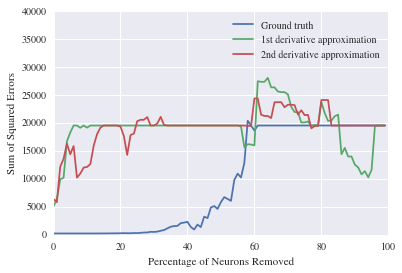

In [12]:
make_graph('circle.network.dnn.greedy-algo-comparison.csv',40000)
make_graph('circle.network.dnn.accuracy-dropoff-comparison.csv',40000)

rshape.network.dnn.greedy-algo-comparison.csv


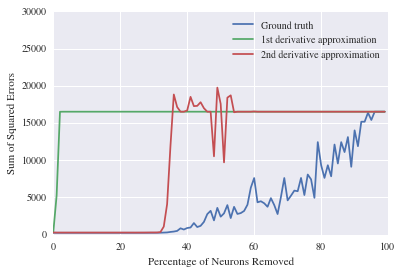

rshape.network.dnn.accuracy-dropoff-comparison.csv


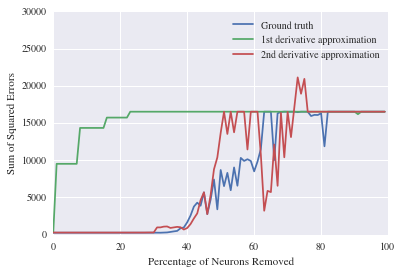

In [13]:
make_graph('rshape.network.dnn.greedy-algo-comparison.csv',30000)
make_graph('rshape.network.dnn.accuracy-dropoff-comparison.csv',30000)

diamond.network.dnn.greedy-algo-comparison.csv


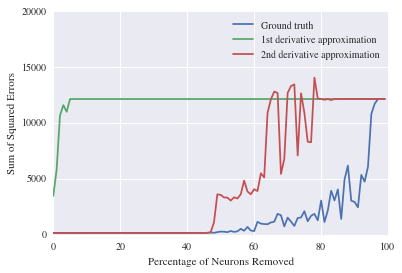

diamond.network.dnn.accuracy-dropoff-comparison.csv


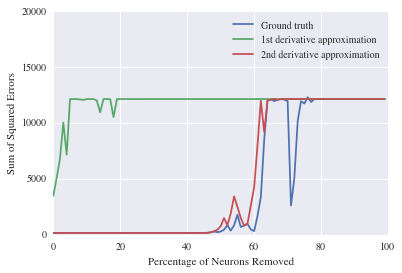

In [14]:
make_graph('diamond.network.dnn.greedy-algo-comparison.csv',20000)
make_graph('diamond.network.dnn.accuracy-dropoff-comparison.csv',20000)

drshape.network.dnn.greedy-algo-comparison.csv


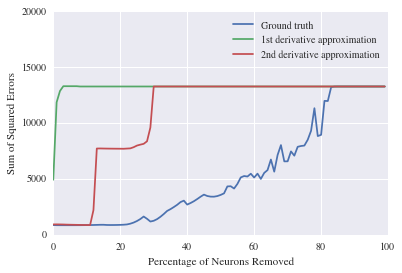

drshape.network.dnn.accuracy-dropoff-comparison.csv


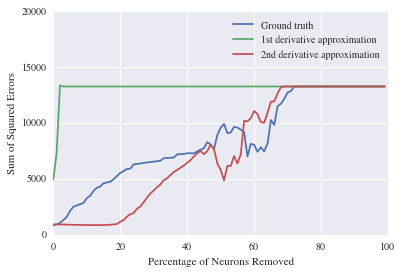

In [15]:
make_graph('drshape.network.dnn.greedy-algo-comparison.csv',20000)
make_graph('drshape.network.dnn.accuracy-dropoff-comparison.csv',20000)

# Further ideas
- To raise confidence in the first and second derivative, a numeric implementation using the quotient of differences may be used.

\begin{align}
\frac{f}{x}
\end{align}

In [16]:
%%bash
cp /Users/nwolfe/git/neural-network/*.csv .

In [17]:
#files = [file for file in glob.glob("xor.*.csv")]
# for f in files:
#     print(f)
#     make_graph(f)

xor.big.network.dnn.accuracy-dropoff-comparison.csv


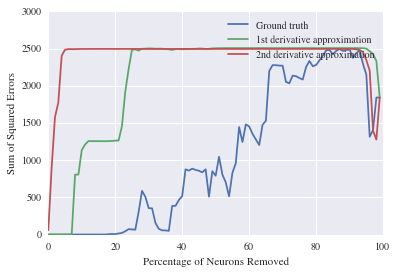

xor.big.network.dnn.greedy-algo-comparison.csv


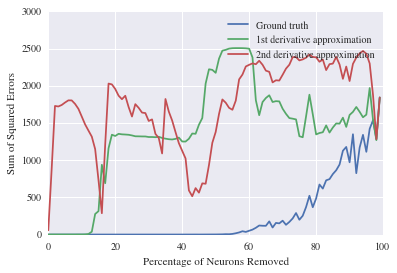

In [18]:
files = ['xor.big.network.dnn.accuracy-dropoff-comparison.csv','xor.big.network.dnn.greedy-algo-comparison.csv']
for f in files:
    make_graph(f, export=True)

In [19]:
%%bash
cat mod.xor.network.dnn.e0-e1-e2-change-result.csv

0.008750153335332175,2.282386653301012E-4,5.738211943770242
0.009297453648653909,1.4334212332503763E-4,3.400110592644307
0.010473649928047266,1.4126139785053634E-4,1.8105301450792046
0.01445137731975421,1.3876004625462007E-4,1.7536143758058897
0.03571533360502042,1.361624602842241E-4,1.6655087022593922
0.07468837046723548,1.275498300284545E-4,1.4716136016412882
0.0974781594067539,1.2626202648394468E-4,1.3967469420972611
0.12714192035467906,1.2509511258237E-4,0.25576059194668593
0.19746885974830858,1.2365538462428887E-4,0.24534267094391513
0.246245587924509,1.1602605670732467E-4,-0.0422114759545139
3.5839726590152514,1.1529863786944595E-4,-1.593478488598358
26.516310129220468,1.1412656887271112E-4,-4.417770654843092
34.878213212963324,1.1383241869583244E-4,-4.5241994095160525
166.64692552194114,1.0461776156641107E-4,-7.911223386869229
254.25272426741455,1.0332782967407087E-4,-35.452421503943235
254.83106005015244,1.0254753296185346E-4,-52.544429072908784
447.7952303751409,9.915585856650

mod.cos.network.dnn.accuracy-dropoff-comparison.csv


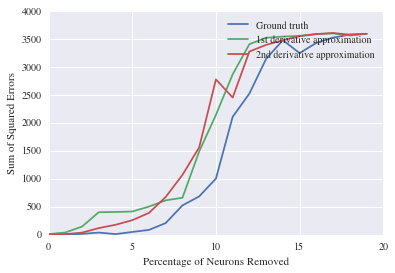

mod.cos.network.dnn.greedy-algo-comparison.csv


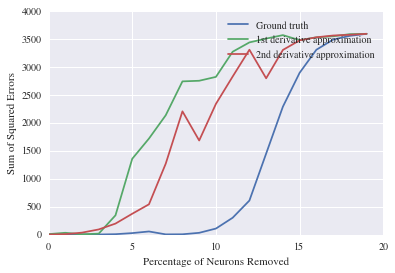

In [20]:
files = ['mod.cos.network.dnn.accuracy-dropoff-comparison.csv','mod.cos.network.dnn.greedy-algo-comparison.csv']
for f in files:
    make_graph(f,export=True)

mod.xor.network.dnn.accuracy-dropoff-comparison.csv


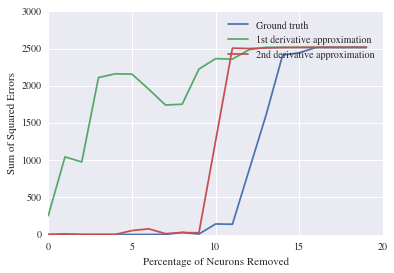

mod.xor.network.dnn.greedy-algo-comparison.csv


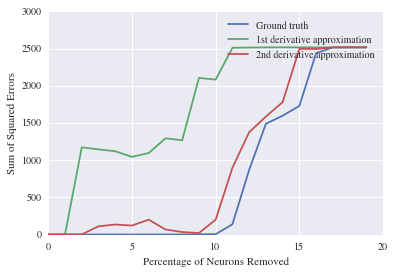

In [21]:
files = ['mod.xor.network.dnn.accuracy-dropoff-comparison.csv','mod.xor.network.dnn.greedy-algo-comparison.csv']
for f in files:
    make_graph(f,export=True)